In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [4]:
data = pd.read_csv("E:\\Data\\Road To data Science\\Datasets\\_marketing_sales_data.csv")

In [5]:
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


<Axes: xlabel='TV', ylabel='Sales'>

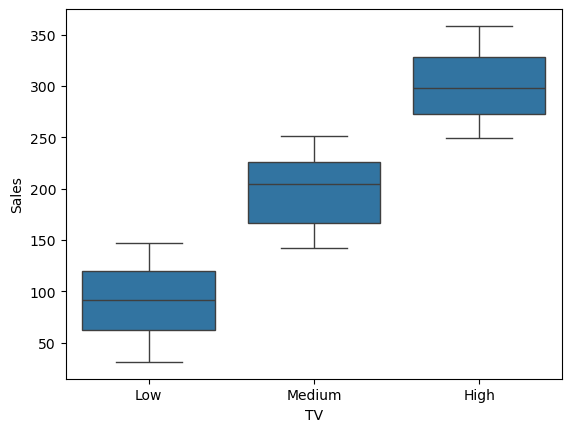

In [8]:
# Create a boxplot with TV and Sales.
sns.boxplot(x=data['TV'],y=data['Sales'])

There is considerable variation in Sales across the TV groups. The significance of these differences can be tested with a one-way ANOVA.

<Axes: xlabel='Influencer', ylabel='Sales'>

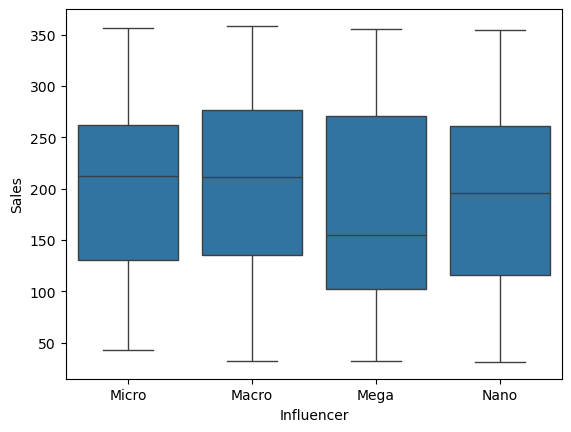

In [9]:
# Create a boxplot with Influencer and Sales.
sns.boxplot(x=data['Influencer'],y=data['Sales'])

There is some variation in Sales across the Influencer groups, but it may not be significant.

In [10]:
#Remove missing data

# Drop rows that contain missing data and update the DataFrame.
data = data.dropna(axis = 0)

# Confirm the data contain no missing values.
data.isnull().sum(axis = 0)

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [12]:
# Model building
 
#Define the OLS formula
ols_formula = 'Sales ~ C(TV)'

# Create an OLS model.
OLS = ols(data=data, formula=ols_formula)

# Fit the model.
model = OLS.fit()

# Save the results summary.
model_results = model.summary()

# Display the model results.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Sat, 26 Oct 2024   Prob (F-statistic):          8.81e-256
Time:                        16:32:40   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

TV was selected as the preceding analysis showed a strong relationship between the TV promotion budget and the average Sales.
Influencer was not selected because it did not show a strong relationship to Sales in the analysis.

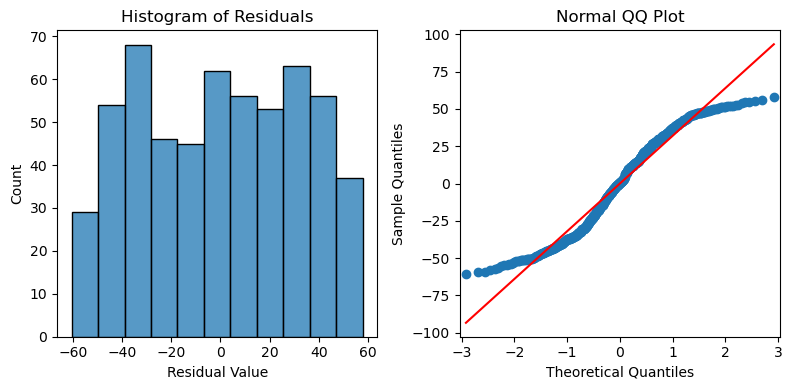

In [13]:
#Check model assumptions
#Normality

#calculate the residuals
residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals.
sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a QQ plot of the residuals.
sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the QQ plot.
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()

There is reasonable concern that the normality assumption is not met when TV is used as the independent variable predicting Sales. The normal q-q forms an 'S' that deviates off the red diagonal line, which is not desired behavior.

However, for the purpose of the lab, continue assuming the normality assumption is met.

Now, verify the constant variance (homoscedasticity) assumption is met for this model.

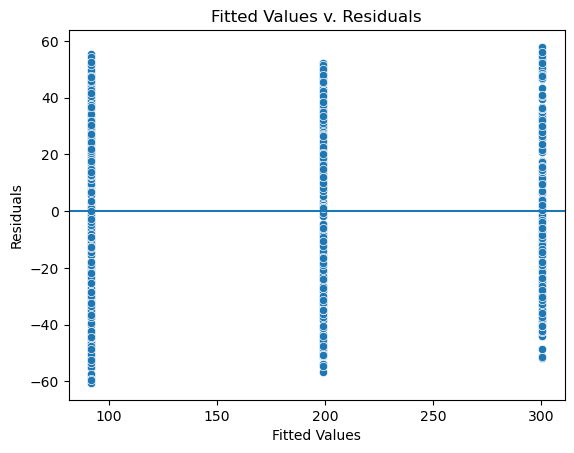

In [14]:
# Create a scatter plot with the fitted values from the model and the residuals.
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x axis label
fig.set_xlabel("Fitted Values")

# Set the y axis label
fig.set_ylabel("Residuals")

# Set the title
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

### YOUR CODE HERE ### 

fig.axhline(0)

# Show the plot
plt.show()

The variance where there are fitted values is similarly distributed, validating that the constant variance assumption is met.


 your model does not have any continuous independent variables, the linearity assumption is not required.

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (row) is independent from one another, the independence assumption is not violated.

In [15]:
#Results and evaluation
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Sat, 26 Oct 2024   Prob (F-statistic):          8.81e-256
Time:                        16:32:40   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:** What is your interpretation of the model's R-squared?

Using TV as the independent variable results in a linear regression model with  𝑅2=0.874
 . In other words, the model explains  87.4%
  of the variation in Sales. This makes the model an effective predictor of Sales.

**Question:** What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?

The default TV category for the model is High, because there are coefficients for the other two TV categories, Medium and Low. According to the model, Sales with a Medium or Low TV category are lower on average than Sales with a High TV category. For example, the model predicts that a Low TV promotion would be 208.813 (in millions of dollars) lower in Sales on average than a High TV promotion.

The p-value for all coefficients is 0.000 , meaning all coefficients are statistically significant at 𝑝=0.05. The 95% confidence intervals for each coefficient should be reported when presenting results to stakeholders. For instance, there is a 95%
chance the interval [−215.353,−202.274] contains the true parameter of the slope of 𝛽𝑇𝑉𝐿𝑜𝑤, which is the estimated difference in promotion sales when a Low TV promotion is chosen instead of a High TV promotion.

**Question:** Do you think your model could be improved? Why or why not? How?

Given how accurate TV was as a predictor, the model could be improved with a more granular view of the TV promotions, such as additional categories or the actual TV promotion budgets. Further, additional variables, such as the location of the marketing campaign or the time of year, may increase model accuracy.

In [16]:
#Perform a one-way ANOVA test

# Create an one-way ANOVA table for the fit model.
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(TV),4.052692e+06,2.0,1971.455737,8.805550e-256
Residual,5.817589e+05,566.0,NaN,NaN


**Question: What are the null and alternative hypotheses for the ANOVA test?**

The null hypothesis is that there is no difference in Sales based on the TV promotion budget.

The alternative hypothesis is that there is a difference in Sales based on the TV promotion budget.

**Question: What is your conclusion from the one-way ANOVA test?**

The F-test statistic is 1971.46 and the p-value is 8.81∗10−256
 (i.e., very small). Because the p-value is less than 0.05, you would reject the null hypothesis that there is no difference in Sales based on the TV promotion budget.

**Question: What did the ANOVA test tell you?**

The results of the one-way ANOVA test indicate that you can reject the null hypothesis in favor of the alternative hypothesis. There is a statistically significant difference in Sales among TV groups.

In [17]:
#Perform an ANOVA post hoc test

# Perform the Tukey's HSD post hoc test.
tukey_oneway = pairwise_tukeyhsd(endog = data["Sales"], groups = data["TV"])

# Display the results
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-208.8133,0.0,-216.6367,-200.9898,True
High,Medium,-101.5061,0.0,-109.3202,-93.6921,True
Low,Medium,107.3072,0.0,99.7066,114.9077,True


**Question: What is your interpretation of the Tukey HSD test?**

The first row, which compares the High and Low TV groups, indicates that you can reject the null hypothesis that there is no significant difference between the Sales of these two groups.

You can also reject the null hypotheses for the two other pairwise comparisons that compare High to Medium and Low to Medium.

**Question: What did the post hoc tell you?**

A post hoc test was conducted to determine which TV groups are different and how many are different from each other. This provides more detail than the one-way ANOVA results, which can at most determine that at least one group is different. Further, using the Tukey HSD controls for the increasing probability of incorrectly rejecting a null hypothesis from peforming multiple tests.

The results were that Sales is not the same between any pair of TV groups.


**CONCLUSION**

**TV Promotion Impact on Sales:**

High TV promotion budgets lead to significantly more sales than medium and low budgets.

Medium budgets also outperform low budgets in sales significantly.

**Estimated Sales Differences (Tukey’s HSD test):**

High vs. Low: $208.81 million (95% CI: $200.99M - $216.64M)

High vs. Medium: $101.51 million (95% CI: $93.69M - $109.32M)

Medium vs. Low: $107.31 million (95% CI: $99.71M - $114.91M)

**Model Insights:**

Linear regression model (R² = 0.871) confirms a strong, statistically significant relationship between TV budget and sales.

One-way ANOVA test supports significant sales differences across TV promotion budgets.

Post hoc Tukey’s HSD test confirms significant differences among all budget levels